In [1]:
# Standard library imports
import os
from pathlib import Path

# 3rd party imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#in_dir = r"C:\Users\franc\PVcharacterization_files"
in_dir = r"C:\Users\AC265100\PVcharacterization_files"
list_data_base = []
for path, _, files in os.walk(in_dir):
    list_data_base.extend(Path(path) / Path(file) for file in files 
                                                  if file.endswith(".csv"))

filename = list_data_base[0]

meta_data = pd.read_csv(filename,
                 sep=',',
                 nrows=83,
                 header=None
                 ) # reads the meta data
meta_data = dict(zip(meta_data[0],meta_data[1]))
meta_data = {key.split(':')[0]:val for key,val  in meta_data.items()}

df = pd.read_csv(filename,
                 sep=',',
                 skiprows=165
                 ) # reads the data
#df.plot()

In [2]:
index_data_header = [0]
for ind,x in enumerate(df[' Voltage:    ']):
    if ('Volt' in x) or  ('Ref Cell' in x):
        index_data_header.append(ind)

index_data_header.append(len(df))
print(index_data_header)
list_df = []

delta=0
for i in range(len(index_data_header)-1):
    if i !=0 :
        delta=1
    list_df.append(df.iloc[df.index.isin(range(index_data_header[i]+delta,
                                               index_data_header[i+1]))])    

[0, 3820, 7641, 12442, 17243, 22044, 26847]


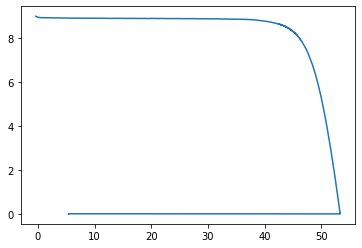

In [7]:
def drop_wrong_values(df):
    x = []
    y = []
    for data_x,data_y in zip(df[' Voltage:    '],df[' Current:']):
        try:
            data_x = float(data_x)
            if data_x != 0.0:
                x.append(data_x)
                y.append(float(data_y))
        except:
            pass
    return(x,y)
color =["r",'g','b']


x,y = drop_wrong_values(list_df[4])
plt.plot(x,y) #,c=color[i])
#plt.xlim(199.5,200.8)

#plt.ylim(0,0.1)

    

In [ ]:
x

In [ ]:
meta_data